In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot
import numpy as np

from selection_methods import SelectionMethod

In [3]:
vapeplot.set_palette('cool')
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

In [4]:
path_data = "../../results_explored_by_task/antibacterial/"
list_documents = os.listdir(path_data)
len(list_documents)

24

In [5]:
list_df = []

for encoder in list_documents:
    list_explored = os.listdir(f"{path_data}{encoder}")
    for element in list_explored:

        df_data = pd.read_csv(f"{path_data}{encoder}/{element}")
        df_data['encoder'] = encoder
        list_df.append(df_data)
df_results = pd.concat(list_df, axis=0)
df_results

,description,validation_accuracy,validation_f1_score,validation_precision,validation_recall,validation_mcc,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder
0,KNeighbors,0.575182,0.536952,0.615265,0.575182,0.187924,0.004460,0.044542,0.518026,0.553814,0.575083,0.553814,6527,Group_4
1,DecisionTree,0.649635,0.649631,0.649697,0.649635,0.299338,0.056320,0.005879,0.665063,0.665202,0.665393,0.665202,6527,Group_4
2,Bagging,0.729927,0.729743,0.730356,0.729927,0.460191,0.368034,0.008356,0.726369,0.726841,0.728327,0.726841,6527,Group_4
3,RandomForest,0.771533,0.771081,0.773316,0.771533,0.544719,0.542702,0.024140,0.750666,0.751563,0.755243,0.751563,6527,Group_4
4,ExtraTrees,0.763504,0.762736,0.766468,0.763504,0.529797,0.488412,0.029984,0.743378,0.744052,0.746756,0.744052,6527,Group_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.843796,0.843828,0.843989,0.843796,0.687550,75.891074,0.013256,0.844151,0.844190,0.844354,0.844190,9218,prottrans_uniref
7,Hist Gradient Boosting,0.864234,0.864268,0.864671,0.864234,0.728752,13.413793,0.020126,0.856040,0.856077,0.856196,0.856077,9218,prottrans_uniref
8,SVC,0.483942,0.315645,0.234199,0.483942,0.000000,3.837627,1.270724,0.382228,0.501880,0.396242,0.501880,9218,prottrans_uniref
9,Gaussian Process,0.546715,0.546465,0.548388,0.546715,0.095463,13.396114,1.060349,0.536546,0.537230,0.537035,0.537230,9218,prottrans_uniref


In [6]:
df_results["overffiting_accuracy"] = df_results["validation_accuracy"]/df_results["train_accuracy"]
df_results["overffiting_f1"] = df_results["validation_f1_score"]/df_results["train_f1_weighted"]
df_results["overffiting_precision"] = df_results["validation_precision"]/df_results["train_precision_weighted"]
df_results["overffiting_recall"] = df_results["validation_recall"]/df_results["train_recall_weighted"]
df_results

,description,validation_accuracy,validation_f1_score,validation_precision,validation_recall,validation_mcc,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder,overffiting_accuracy,overffiting_f1,overffiting_precision,overffiting_recall
0,KNeighbors,0.575182,0.536952,0.615265,0.575182,0.187924,0.004460,0.044542,0.518026,0.553814,0.575083,0.553814,6527,Group_4,1.038585,1.036534,1.069873,1.038585
1,DecisionTree,0.649635,0.649631,0.649697,0.649635,0.299338,0.056320,0.005879,0.665063,0.665202,0.665393,0.665202,6527,Group_4,0.976597,0.976796,0.976410,0.976597
2,Bagging,0.729927,0.729743,0.730356,0.729927,0.460191,0.368034,0.008356,0.726369,0.726841,0.728327,0.726841,6527,Group_4,1.004245,1.004645,1.002787,1.004245
3,RandomForest,0.771533,0.771081,0.773316,0.771533,0.544719,0.542702,0.024140,0.750666,0.751563,0.755243,0.751563,6527,Group_4,1.026571,1.027196,1.023931,1.026571
4,ExtraTrees,0.763504,0.762736,0.766468,0.763504,0.529797,0.488412,0.029984,0.743378,0.744052,0.746756,0.744052,6527,Group_4,1.026143,1.026041,1.026397,1.026143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.843796,0.843828,0.843989,0.843796,0.687550,75.891074,0.013256,0.844151,0.844190,0.844354,0.844190,9218,prottrans_uniref,0.999533,0.999617,0.999568,0.999533
7,Hist Gradient Boosting,0.864234,0.864268,0.864671,0.864234,0.728752,13.413793,0.020126,0.856040,0.856077,0.856196,0.856077,9218,prottrans_uniref,1.009528,1.009612,1.009899,1.009528
8,SVC,0.483942,0.315645,0.234199,0.483942,0.000000,3.837627,1.270724,0.382228,0.501880,0.396242,0.501880,9218,prottrans_uniref,0.964258,0.825803,0.591051,0.964258
9,Gaussian Process,0.546715,0.546465,0.548388,0.546715,0.095463,13.396114,1.060349,0.536546,0.537230,0.537035,0.537230,9218,prottrans_uniref,1.017656,1.018486,1.021140,1.017656


In [7]:
df_results_train = df_results[['description', 'train_f1_weighted',
            'train_recall_weighted', 'train_precision_weighted', 'train_accuracy',
            'iteration', 'encoder']]

df_results_train.columns = ["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]
df_results_train['Stage'] = "Training"

df_results_validation = df_results[['description', 'validation_accuracy', 'validation_f1_score', 'validation_precision',
    'validation_recall', 'validation_mcc', 'iteration', 'encoder']]

df_results_validation.columns = ["Algorithm", "Accuracy", "F1", "Precision", "Recall", "MCC", "Iteration", "Encoder"]
df_results_validation['Stage'] = "Validating"

df_concat = pd.concat([df_results_train, df_results_validation], axis=0)
df_concat["Task"] = "Antibacterial"

df_concat.to_csv("../../results_explored_by_task/summary_models_explored/antibacterial_explored.csv", index=False)

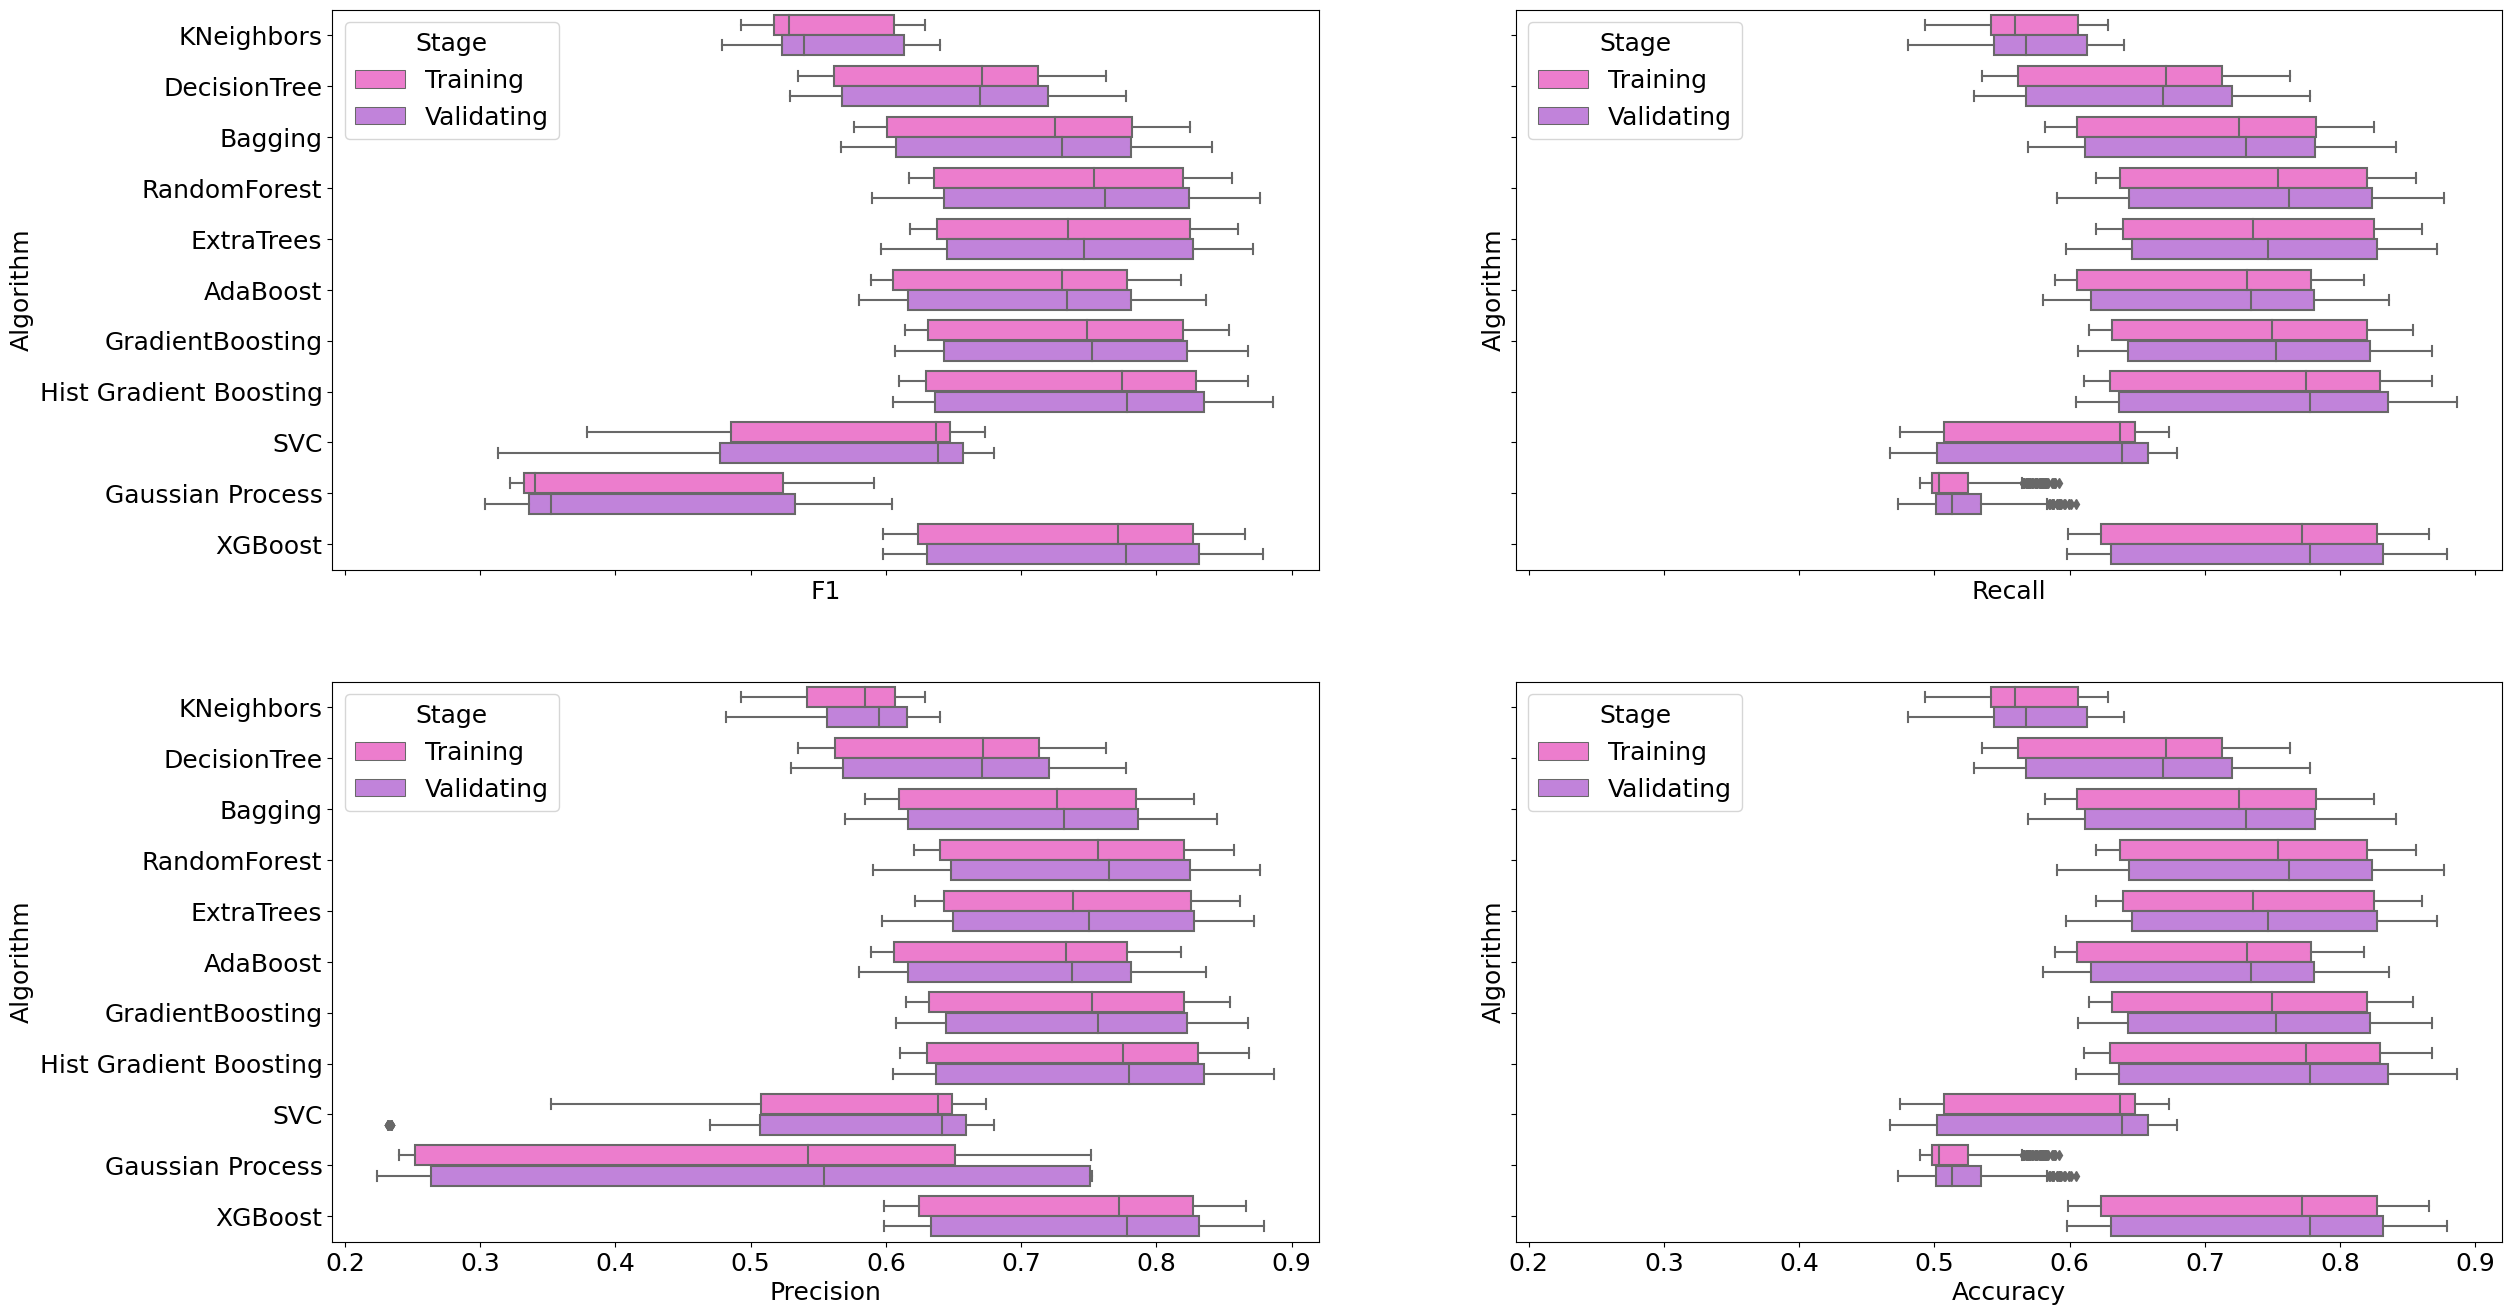

In [18]:
fig, axes = plt.subplots(2,2, figsize=(28,16), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0][0], data=df_concat, x="F1", hue="Stage", y="Algorithm")
ax2 = sns.boxplot(ax=axes[0][1], data=df_concat, x="Recall", hue="Stage", y="Algorithm")
ax3 = sns.boxplot(ax=axes[1][0], data=df_concat, x="Precision", hue="Stage", y="Algorithm")
ax4 = sns.boxplot(ax=axes[1][1], data=df_concat, x="Accuracy", hue="Stage", y="Algorithm")

plt.savefig("../../results_explored_by_task/summary_models_explored/antibacterial/algorithm_distribution.png")

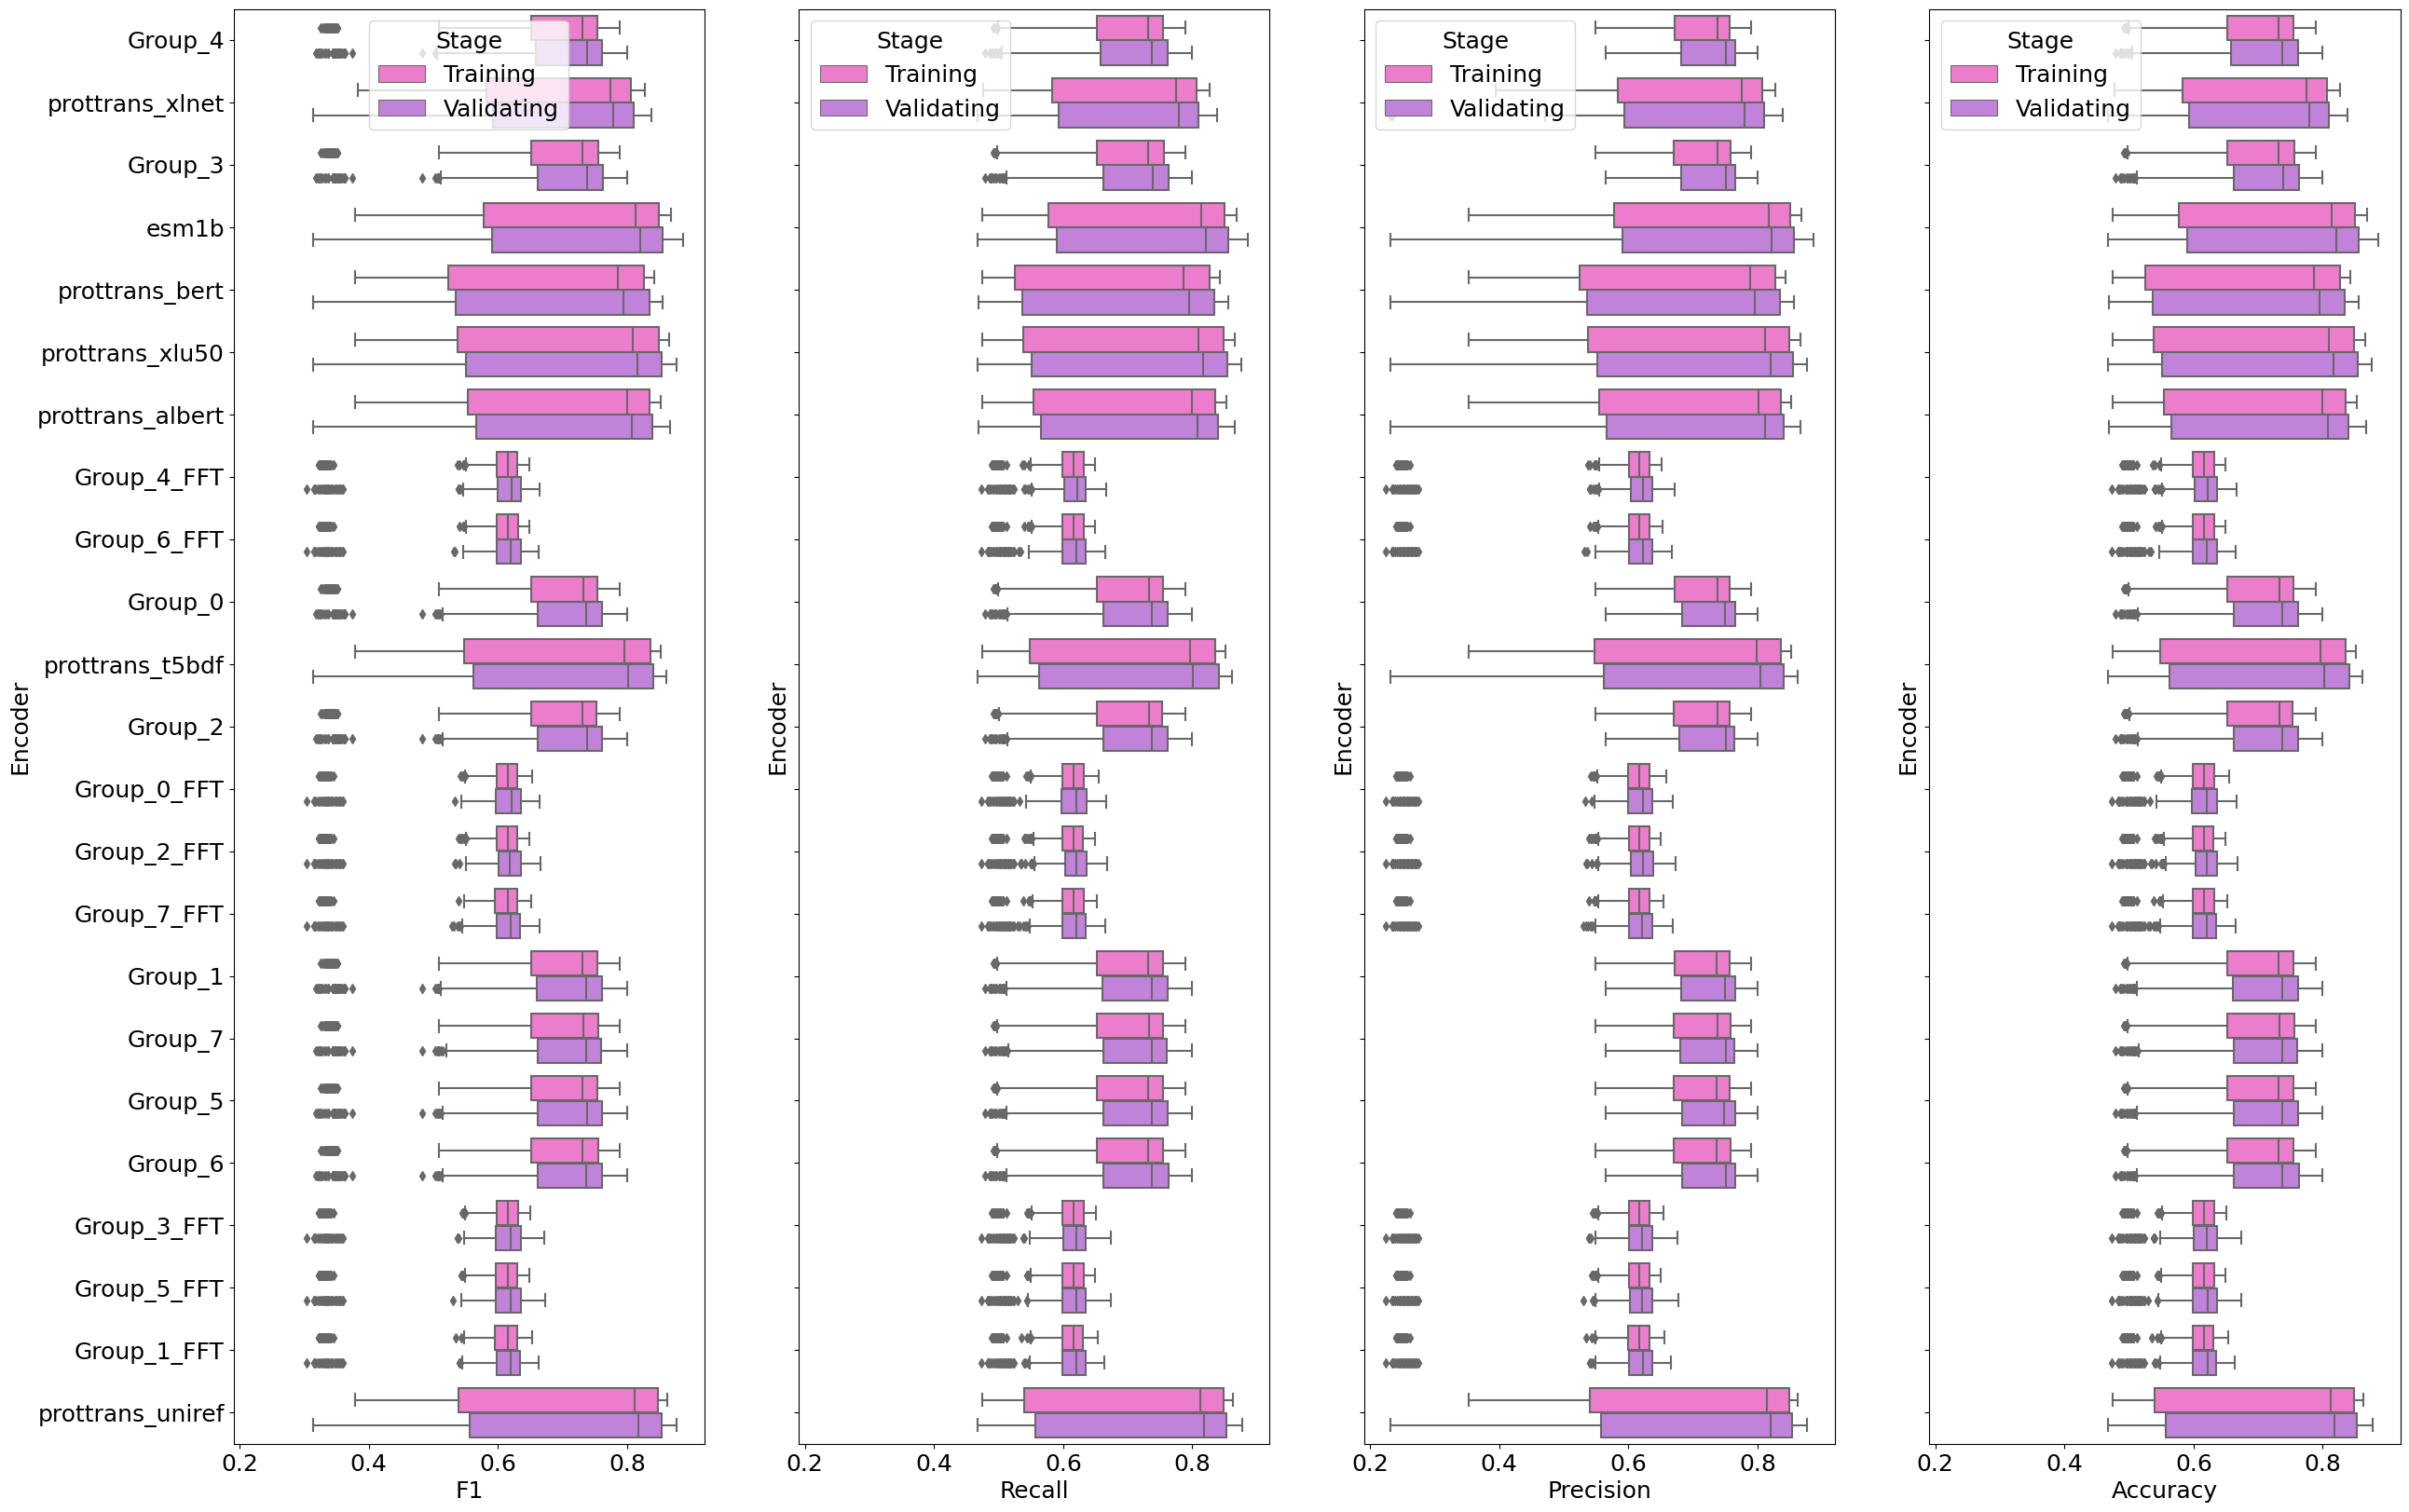

In [19]:
fig, axes = plt.subplots(1,4, figsize=(30,20), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0], data=df_concat, x="F1", hue="Stage", y="Encoder")
ax2 = sns.boxplot(ax=axes[1], data=df_concat, x="Recall", hue="Stage", y="Encoder")
ax3 = sns.boxplot(ax=axes[2], data=df_concat, x="Precision", hue="Stage", y="Encoder")
ax4 = sns.boxplot(ax=axes[3], data=df_concat, x="Accuracy", hue="Stage", y="Encoder")

plt.savefig("../../results_explored_by_task/summary_models_explored/antibacterial/encoder_distribution.png")

In [20]:
selection_instance = SelectionMethod()
df_selection = selection_instance.select(15, df_results_train, df_results_validation)
df_selection.to_csv("../../results_explored_by_task/summary_models_explored/antibacterial/selected_combinations.csv", index=False)
df_selection

,Algorithm,Encoder,mean_accuracy_training_x,mean_f_score_training_x,mean_precision_training_x,mean_recall_training_x,mean_accuracy_testing_x,mean_f_score_testing_x,mean_precision_testing_x,mean_recall_testing_x,mean_accuracy_testing_y,mean_f_score_testing_y,mean_precision_testing_y,mean_recall_testing_y,mean_accuracy_training_y,mean_f_score_training_y,mean_precision_training_y,mean_recall_training_y,Voting
85,ExtraTrees,esm1b,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
86,ExtraTrees,prottrans_albert,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
88,ExtraTrees,prottrans_t5bdf,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
91,ExtraTrees,prottrans_xlu50,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
135,GradientBoosting,prottrans_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
156,Hist Gradient Boosting,prottrans_bert,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
157,Hist Gradient Boosting,prottrans_t5bdf,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
200,RandomForest,esm1b,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
201,RandomForest,prottrans_albert,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
203,RandomForest,prottrans_t5bdf,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16


In [12]:
df_results_validation[(df_results_validation["Algorithm"] == "ExtraTrees") & (df_results_validation["Encoder"] == "esm1b")].describe()

,Accuracy,F1,Precision,Recall,MCC,Iteration
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.857348,0.857221,0.858808,0.857348,0.715997,5452.666667
std,0.007592,0.007620,0.007263,0.007592,0.014759,2480.125836
min,0.839416,0.839099,0.841032,0.839416,0.680142,980.000000
25%,0.852920,0.852813,0.854488,0.852920,0.708082,3923.750000
50%,0.856934,0.856741,0.858946,0.856934,0.715540,5712.000000
75%,0.861861,0.861754,0.862514,0.861861,0.723639,7109.500000
max,0.870803,0.870733,0.871445,0.870803,0.742219,9858.000000
